In [2]:
import numpy as np
import pandas as pd
from comet_ml import Experiment
from matplotlib import pyplot as plt
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from scripts.Basic_model import *


Data loading

In [3]:
data = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

In [4]:
experiment = Experiment(
    api_key="Bgx9192SVK3nzJNLQcV5nneQS",
    project_name="milestone-2",
    workspace="me-pic"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/516700449b974031bd0f9556a7958be5



Setting label

In [5]:
X = data[['distance_from_last_event', 'changement_angle_tir']]
y = data['goalFlag']

Splitting Data train / Val (80-20)

In [6]:
# On split 80 / 20 les donnees
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Training xgboost

In [7]:
xgboost_classifier = xgb.XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

y_pred_proba = xgboost_classifier.predict_proba(X_test)[:, 1]

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\User

Calculating ROC

In [10]:
y_pred_proba.shape
y_pred_proba

array([0.04289   , 0.07087439, 0.08558605, ..., 0.08187789, 0.10888676,
       0.15956275], dtype=float32)

ROC AUC Score: 0.5833251614663786


AttributeError: Line2D.set() got an unexpected keyword argument 'plot_chance_level'

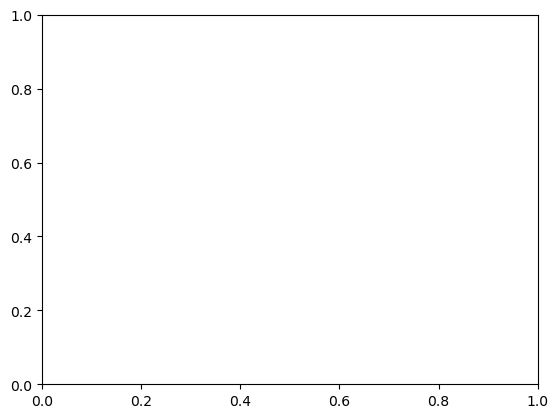

In [11]:
# Receiver Operating Characteristic
#ROC_plot(y_test, y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC_plot(y_test, y_pred_proba)

#Taux de buts
Centiles_plot(y_test, y_pred_proba)

# Cumule de buts
cumulative_centiles_plot(y_test, y_pred_proba)

# Calibration display
reshaped_X1_val = X_test.values.reshape(-1,1)
reshaped_y1_val = y_train.values.reshape(-1,1)
calibrate_display(xgboost_classifier, X_test, y_test, 30)

Hyperparameter tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(
    estimator=xgboost_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)

# We train with the Grid Search
grid_search.fit(X_train, y_train)

# We output the best parameters that were given
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\User

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
ROC AUC Score: 0.5901184883559806


C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


Retraining XGBoost with new parameters

In [1]:
# We retrain the model with the new parameters
best_xgboost_classifier = grid_search.best_estimator_
y_pred_proba = best_xgboost_classifier.predict_proba(X_test)[:, 1]

# We evaluate once again
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

ROC_plot(y_test, y_pred_proba)

#Taux de buts
Centiles_plot(y_test, y_pred_proba)

# Cumule de buts
cumulative_centiles_plot(y_test, y_pred_proba)

# Calibration display
calibrate_display(xgboost_classifier, X_test, y_test, 30)

NameError: name 'grid_search' is not defined